In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
a = tf.random.uniform(shape=([3,300]))
b = tf.random.uniform(shape=([3,300]))
a = np.array([[1, 0], [0.5, 0], [0, 1]])
b = np.array([[1, 0], [0.5, 0], [0, 1]])
np.inner(a, b)

array([[1.  , 0.5 , 0.  ],
       [0.5 , 0.25, 0.  ],
       [0.  , 0.  , 1.  ]])

In [3]:
tf.random.uniform(shape=([2,3])).numpy()

array([[0.6679268 , 0.63681054, 0.47770905],
       [0.28477323, 0.11964715, 0.57705593]], dtype=float32)

In [4]:
from __future__ import unicode_literals
import spacy

nlp = spacy.load('en_core_web_lg')
doc = nlp(open("pg345.txt").read())

In [5]:
tokens = (list(set([w.text for w in doc if w.is_alpha])))

In [6]:
tokens

['catch',
 'POSSIBILITY',
 'meagre',
 'managed',
 'laziness',
 'bribery',
 'Board',
 'bag',
 'STATES',
 'unnerve',
 'FOR',
 'Lively',
 'crowned',
 'turnings',
 'SONS',
 'stand',
 'dawdle',
 'balance',
 'gross',
 'strange',
 'attract',
 'vibrate',
 'remaining',
 'calculate',
 'bigger',
 't',
 'lamiter',
 'deemed',
 'Language',
 'driven',
 'Fairbanks',
 'thirsty',
 'Before',
 'candle',
 'thankfully',
 'choked',
 'nearly',
 'world',
 'unprepared',
 'experiment',
 'dozed',
 'swarm',
 'fust',
 'sprang',
 'flagboat',
 'sheath',
 'peril',
 'Each',
 'truth',
 'outer',
 'fruit',
 'star',
 'etymology',
 'unlike',
 'malignity',
 'sixty',
 'adjusted',
 'IX',
 'Art',
 'juniper',
 'arsk',
 'abasement',
 'page',
 'suggested',
 'ray',
 'knot',
 'grup',
 'creature',
 'toes',
 'moments',
 'Cattle',
 'lunatics',
 'adjacent',
 'curtainless',
 'summer',
 'growing',
 'never',
 'Elliot',
 'justified',
 'victorious',
 'Down',
 'open',
 'devouring',
 'demonstrative',
 'Company',
 'intents',
 'skeleton',
 'Suff

In [7]:
apple = nlp.vocab['apple']
apple.vector

array([-3.6391e-01,  4.3771e-01, -2.0447e-01, -2.2889e-01, -1.4227e-01,
        2.7396e-01, -1.1435e-02, -1.8578e-01,  3.7361e-01,  7.5339e-01,
       -3.0591e-01,  2.3741e-02, -7.7876e-01, -1.3802e-01,  6.6992e-02,
       -6.4303e-02, -4.0024e-01,  1.5309e+00, -1.3897e-02, -1.5657e-01,
        2.5366e-01,  2.1610e-01, -3.2720e-01,  3.4974e-01, -6.4845e-02,
       -2.9501e-01, -6.3923e-01, -6.2017e-02,  2.4559e-01, -6.9334e-02,
       -3.9967e-01,  3.0925e-02,  4.9033e-01,  6.7524e-01,  1.9481e-01,
        5.1488e-01, -3.1149e-01, -7.9939e-02, -6.2096e-01, -5.3277e-03,
       -1.1264e-01,  8.3528e-02, -7.6947e-03, -1.0788e-01,  1.6628e-01,
        4.2273e-01, -1.9009e-01, -2.9035e-01,  4.5630e-02,  1.0120e-01,
       -4.0855e-01, -3.5000e-01, -3.6175e-01, -4.1396e-01,  5.9485e-01,
       -1.1524e+00,  3.2424e-02,  3.4364e-01, -1.9209e-01,  4.3255e-02,
        4.9227e-02, -5.4258e-01,  9.1275e-01,  2.9576e-01,  2.3658e-02,
       -6.8737e-01, -1.9503e-01, -1.1059e-01, -2.2567e-01,  2.41

In [8]:
nlp.vocab[33].text

'FLAG33'

In [9]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is VERB aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [10]:
def cosine(v1, v2):
    if(np.linalg.norm(v1) > 0) and (np.linalg.norm(v2) > 0):
        return (np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    else:
        return 0.0

In [11]:
cosine(nlp.vocab["apple"].vector, nlp.vocab["plum"].vector)

0.5650273

In [12]:
doc.ents[1].label_

'GPE'

In [13]:
X = tf.range(10, 20)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset_2 = dataset.repeat(3).batch(7).map(lambda x:x*2)

dataset_shuffled = dataset_2.shuffle(buffer_size = 5)

for idx,item in enumerate(dataset_shuffled):
    print(idx, " -> ", item)

0  ->  tf.Tensor([22 24 26 28 30 32 34], shape=(7,), dtype=int32)
1  ->  tf.Tensor([28 30 32 34 36 38 20], shape=(7,), dtype=int32)
2  ->  tf.Tensor([36 38], shape=(2,), dtype=int32)
3  ->  tf.Tensor([34 36 38 20 22 24 26], shape=(7,), dtype=int32)
4  ->  tf.Tensor([20 22 24 26 28 30 32], shape=(7,), dtype=int32)


In [14]:
for data in dataset:
    print(data)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


In [15]:
dataset.repeat(3)

<RepeatDataset shapes: (), types: tf.int32>

In [16]:
dataset.repeat(3).batch(7)

<BatchDataset shapes: (None,), types: tf.int32>

In [17]:
[0.]*8 + [tf.constant([], dtype=tf.float32)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 <tf.Tensor: id=77, shape=(0,), dtype=float32, numpy=array([], dtype=float32)>]

In [18]:
([1]*8)

[1, 1, 1, 1, 1, 1, 1, 1]

In [19]:
tf.stack(
    (tf.constant(2), tf.constant(20), tf.constant(200))
)


<tf.Tensor: id=81, shape=(3,), dtype=int32, numpy=array([  2,  20, 200])>

In [20]:
[tf.constant(2), tf.constant([20]), tf.constant(200)]

[<tf.Tensor: id=82, shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: id=83, shape=(1,), dtype=int32, numpy=array([20])>,
 <tf.Tensor: id=84, shape=(), dtype=int32, numpy=200>]

In [21]:
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
indicies = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indicies)

In [22]:
print(indicies)
print(table_init)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


W1014 13:54:27.633770 21528 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


{'test': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>, 'train': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}
train:  <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
-----
(28, 28, 1)
[7 1 7 0 8 8 6 6 6 4 3 0 1 7 7 7 0 4 9 2 5 9 6 3 3 4 3 0 7 4 9 4]


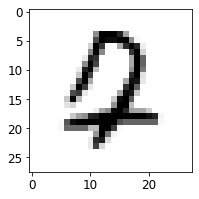

In [81]:
import tensorflow_datasets as tfds
dataset = tfds.load(name="mnist")

print (dataset)
print ("train: ", dataset["train"])
print ("-----")
plt.figure(figsize=(6,3))
for item in dataset["train"].batch(32):
    image = item["image"]
    label = item["label"]
    print(image[0].numpy().shape)
    print(label.numpy())
    plt.imshow(image[0][..., 0], cmap="binary")
    break

        


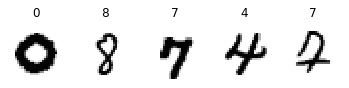

In [71]:
plt.figure(figsize=(6,3))
mnist_train = dataset["train"].repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch